# ADA Project : Milestone 2

## TITLE

Description kekw.

### 1) Imports

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import requests
import gzip
import math
from bs4 import BeautifulSoup

### 2) Utility functions

In [150]:
def freebase_to_wiki_id(freebase_id) -> str | None:
    """
    Query Wikidata ID from Freebase ID
    :param freebase_id: str
    :return: corresponding wiki ID
    """
    url = f"https://www.wikidata.org/w/index.php?search={freebase_id}&title=Special%3ASearch&go=Go"
    res = BeautifulSoup(requests.get(url).text, "html.parser")\
        .find("div", {"class": "mw-search-result-heading"})
    if res is not None:
        return res.find("a")["href"].split("/")[-1]
    return None

path_corenlp = '../data/corenlp_plot_summaries/'

def parse_summaries(file: str) -> BeautifulSoup:
    """
    Parse XML npl processed summary
    :param file: name of
    :return: BeautifulSoup object
    """
    with gzip.open(path_corenlp + file, 'rb') as f:
        data = f.read()
    return BeautifulSoup(data, features="xml")

### 3) Metadata analysis

In [151]:
metadata_df = pd.read_csv('data/movie.metadata.tsv', sep="\t")
metadata_df

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples)
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


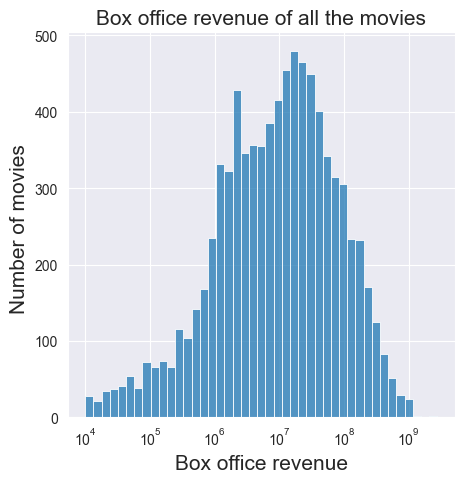

In [152]:
box_office_rev = 'Movie box office revenue'

plt.figure(figsize=(5, 5))
plt.xlabel('Box office revenue', fontsize = 15)
plt.ylabel('Number of movies ', fontsize=15)
plt.title('Box office revenue of all the movies', fontsize=15)
metadata_df = metadata_df[metadata_df[box_office_rev].notnull()]
sns.histplot(data=metadata_df[box_office_rev], log_scale=True)
plt.show()

In [153]:
metadata_df['Movie release year'] = metadata_df['Movie release date'].astype(str).str[:4]
metadata_df = metadata_df[metadata_df["Movie release year"].str.contains("nan") == False]
metadata_df['Movie release year'].astype(int)

profits_year = metadata_df.groupby('Movie release year')[box_office_rev]
means_year = profits_year.mean()[1:]
sums_year = profits_year.sum()[1:]
means_year

C:\Users\diced\AppData\Local\Temp\ipykernel_2636\3826357878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_df['Movie release year'] = metadata_df['Movie release date'].astype(str).str[:4]


Movie release year
1897    1.000000e+05
1914    7.079320e+05
1915    5.000000e+07
1920    4.500000e+06
1921    2.633333e+06
            ...     
2008    6.071359e+07
2009    6.835295e+07
2010    7.008336e+07
2011    7.782684e+07
2012    1.088101e+08
Name: Movie box office revenue, Length: 96, dtype: float64

In [154]:
def plot_by_year(df_year: pd.Series, prefix: str):
    """
    Plot a year grouped column
    :param df_year: said column
    :param prefix: str
    """
    fig, ax = plt.subplots()

    fig.set_size_inches(12, 6)
    ax.set_xlabel('Release year', fontsize = 12, )
    ax.set_ylabel(f'{prefix} box office revenue', fontsize = 12)
    ax.set_title(f'{prefix} box office revenue by year')
    ax.set_label("Floats")
    ax.plot(np.asarray(df_year.index, float), df_year.values)

    plt.show()

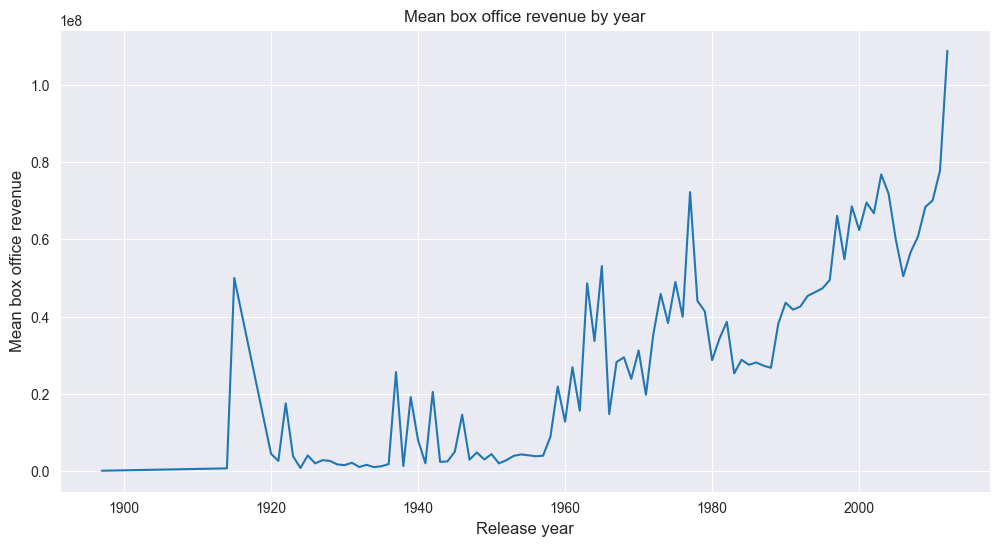

In [155]:
plot_by_year(means_year, "Mean")

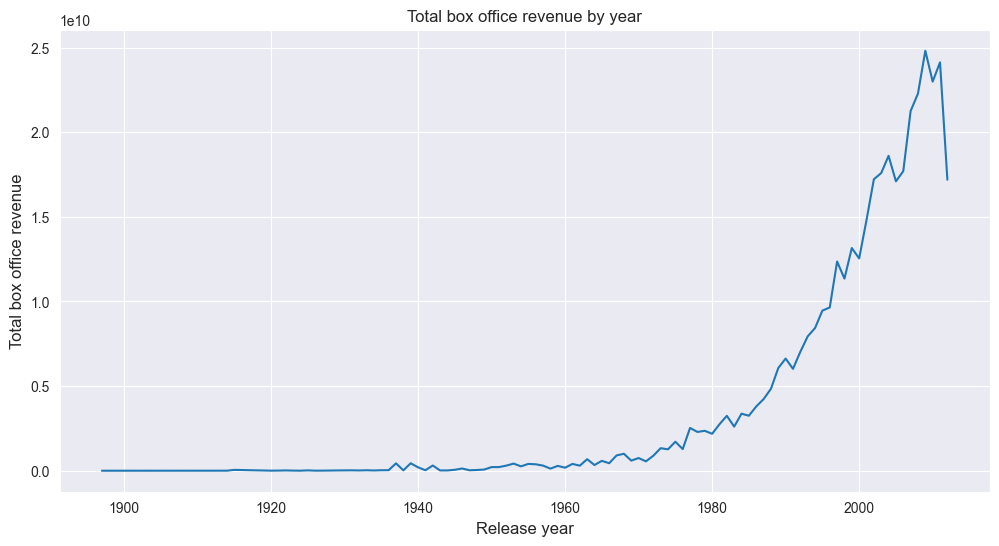

In [156]:
plot_by_year(sums_year, "Total")

In [157]:
def remove_first_and_last_chars(input_str: str) -> str:
    """
    Remove the first and last char of a string.
    :param input_str
    :return: processed string
    """
    if len(input_str) < 2:
        return ""
    return input_str[1:-1]

def separate_id_from_data(paired_string: str, remove_brackets=True) -> (str, str):
    """
    Separates "{"FreebaseID": "some string"}" strings into ("FreebaseID", "some string") tuples.
    :param paired_string: input paired string
    :param remove_brackets: if True, remove the leading and trailing curly brackets
    :return: said tuple of strings
    """
    if remove_brackets:
        paired_string = remove_first_and_last_chars(paired_string)

    ls = paired_string.split(":")
    for i, s in enumerate(ls):
        ls[i] = remove_first_and_last_chars(s.strip())

    if len(ls) < 2:
        return None, None
    return ls[0], ls[1]

def separate_ids_from_list_data(list_paired_string: str) -> (list, list):
    """
    Separates "{"FreebaseID1": "some string 1", "FreebaseID2": "some string 2", etc.}" strings
    into two lists: (["FreebaseID1", "FreebaseID2", ...], ["some string 1", "some string 2", ...]).
    :param list_paired_string: input list of pairs as string
    :return: said tuple of lists
    """
    list_paired_string = remove_first_and_last_chars(list_paired_string)
    split_pairs = list_paired_string.split(",")
    tupled_pairs = [separate_id_from_data(pair, remove_brackets=False) for pair in split_pairs]
    return [p[0] for p in tupled_pairs], [p[1] for p in tupled_pairs]

def col_to_col_values(column_name: str) -> str:
    """
    String formatting for value column names
    :param column_name: original column name
    :return: said formatted string
    """
    return f"{column_name}: values"

def append_processed_columns(df: pd.DataFrame, column_name: str):
    """
    Separate Freebase IDs from values
    :param df: data, modified in place
    :param column_name: name of column where to separate {Freebase ID: value} pairs
    """
    vals = df[column_name].apply(separate_ids_from_list_data).values
    df[f"{column_name}: Freebase IDs"] = [vals[i][0] for i in range(len(vals))]
    df[col_to_col_values(column_name)] = [vals[i][1] for i in range(len(vals))]
    df.drop(column_name, axis=1, inplace=True)

In [158]:
metadata_df.rename(columns={"Movie countries (Freebase ID:name tuples)": "Movie countries",
                    "Movie genres (Freebase ID:name tuples)": "Movie genres"}, inplace=True)

cols_to_process = ["Movie countries", "Movie genres", "Movie languages"]
for col in cols_to_process:
    append_processed_columns(metadata_df, col)

metadata_df

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie release year,Movie countries: Freebase IDs,Movie countries: values,Movie genres: Freebase IDs,Movie genres: values,Movie languages: Freebase IDs,Movie languages: values
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,2001,[/m/09c7w0],[United States of America],"[/m/01jfsb, /m/06n90, /m/03npn, /m/03k9fj, /m/...","[Thriller, Science Fiction, Horror, Adventure,...",[/m/02h40lc],[English Language]
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,1938,[/m/09c7w0],[United States of America],"[/m/04t36, /m/01z4y, /m/01g6gs]","[Musical, Comedy, Black-and-white]",[/m/02h40lc],[English Language]
13,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,1989,[/m/07ssc],[United Kingdom],"[/m/04xvh5, /m/082gq, /m/06l3bl, /m/04xvlr, /m...","[Costume drama, War film, Epic, Period piece, ...",[/m/02h40lc],[English Language]
17,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,1964,[/m/09c7w0],[United States of America],"[/m/0hj3myq, /m/04t36, /m/01hmnh, /m/01z4y, /m...","[Children's/Family, Musical, Fantasy, Comedy, ...",[/m/02h40lc],[English Language]
21,612710,/m/02wjqm,New Rose Hotel,1999-10-01,21521.0,92.0,1999,[/m/09c7w0],[United States of America],"[/m/01jfsb, /m/06n90, /m/0279xh5, /m/0219x_, /...","[Thriller, Science Fiction, Future noir, Indie...",[/m/02h40lc],[English Language]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81695,54540,/m/0f7hw,Coming to America,1988-06-29,288752301.0,117.0,1988,[/m/09c7w0],[United States of America],"[/m/06cvj, /m/03p5xs, /m/07s9rl0, /m/01z4y, /m...","[Romantic comedy, Comedy of manners, Drama, Co...",[/m/02h40lc],[English Language]
81720,7761830,/m/0kvgqb,Spaced Invaders,1990,15369573.0,100.0,1990,[/m/09c7w0],[United States of America],"[/m/0hj3mt0, /m/06n90, /m/0hqxf, /m/01z4y, /m/...","[Alien Film, Science Fiction, Family Film, Com...",[/m/02h40lc],[English Language]
81725,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,2000,"[/m/0f8l9c, /m/09c7w0]","[France, United States of America]","[/m/0gf28, /m/09n5t_, /m/01z4y]","[Parody, Americana, Comedy]","[/m/02bjrlw, /m/02h40lc]","[Italian Language, English Language]"
81726,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,1993,[/m/09c7w0],[United States of America],"[/m/01jfsb, /m/0glj9q, /m/09blyk, /m/02wtdps, ...","[Thriller, Erotic thriller, Psychological thri...",[None],[None]


In [159]:
def distinct_values(column_name: str) -> set:
    """
    Get all values from a column
    :param column_name: said column
    :return: set of values
    """
    return set.union(*metadata_df[col_to_col_values(column_name)].apply(set).values)

def name_appended_column(prefix: str, val: str) -> str:
    """
    Format column name
    :param prefix: str
    :param val: str
    :return: str
    """
    return f"{prefix}: {val}"

def append_indicator_columns(df: pd.DataFrame, all_values: set, column_name: str, prefix: str) -> pd.DataFrame:
    """
    Add columns to the right of a dataframe indicating whether a particular value is present or not
    in some initial column listing values of the same family
    :param df: data (not modified)
    :param all_values: all possible values
    :param column_name: column to inspect
    :param prefix: str
    :return: Dataframe with added columns
    """
    cols = [df[col_to_col_values(column_name)]
            .apply(lambda x: 1 if val in x else 0)
            .rename(name_appended_column(prefix, val))
            for val in all_values]
    cols.insert(0, df)
    return pd.concat(cols, axis=1)

In [160]:
all_countries = distinct_values("Movie countries")
all_genres = distinct_values("Movie genres")
all_languages = distinct_values("Movie languages")

genre_prefix = "genre"
langs_prefix = "lang"
cntry_prefix = "country"

In [161]:
for ls in [(all_countries, "Movie countries", cntry_prefix),
            (all_genres, "Movie genres", genre_prefix),
            (all_languages, "Movie languages", langs_prefix)]:
    metadata_df = append_indicator_columns(metadata_df, *ls)

metadata_df

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie release year,Movie countries: Freebase IDs,Movie countries: values,Movie genres: Freebase IDs,...,lang: Chechen Language,lang: Nepali Language,lang: Hopi Language,lang: Mende Language,lang: Dari,lang: Standard Tibetan,lang: Indonesian Language,lang: Greek Language,lang: Finnish Language,lang: Tzotzil language
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,2001,[/m/09c7w0],[United States of America],"[/m/01jfsb, /m/06n90, /m/03npn, /m/03k9fj, /m/...",...,0,0,0,0,0,0,0,0,0,0
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,1938,[/m/09c7w0],[United States of America],"[/m/04t36, /m/01z4y, /m/01g6gs]",...,0,0,0,0,0,0,0,0,0,0
13,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,1989,[/m/07ssc],[United Kingdom],"[/m/04xvh5, /m/082gq, /m/06l3bl, /m/04xvlr, /m...",...,0,0,0,0,0,0,0,0,0,0
17,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,1964,[/m/09c7w0],[United States of America],"[/m/0hj3myq, /m/04t36, /m/01hmnh, /m/01z4y, /m...",...,0,0,0,0,0,0,0,0,0,0
21,612710,/m/02wjqm,New Rose Hotel,1999-10-01,21521.0,92.0,1999,[/m/09c7w0],[United States of America],"[/m/01jfsb, /m/06n90, /m/0279xh5, /m/0219x_, /...",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81695,54540,/m/0f7hw,Coming to America,1988-06-29,288752301.0,117.0,1988,[/m/09c7w0],[United States of America],"[/m/06cvj, /m/03p5xs, /m/07s9rl0, /m/01z4y, /m...",...,0,0,0,0,0,0,0,0,0,0
81720,7761830,/m/0kvgqb,Spaced Invaders,1990,15369573.0,100.0,1990,[/m/09c7w0],[United States of America],"[/m/0hj3mt0, /m/06n90, /m/0hqxf, /m/01z4y, /m/...",...,0,0,0,0,0,0,0,0,0,0
81725,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,2000,"[/m/0f8l9c, /m/09c7w0]","[France, United States of America]","[/m/0gf28, /m/09n5t_, /m/01z4y]",...,0,0,0,0,0,0,0,0,0,0
81726,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,1993,[/m/09c7w0],[United States of America],"[/m/01jfsb, /m/0glj9q, /m/09blyk, /m/02wtdps, ...",...,0,0,0,0,0,0,0,0,0,0


In [162]:
from functools import cmp_to_key

def retrieve_n_most_frequent(df: pd.DataFrame, n: int, all_vals: list, prefix: str) -> list:
    """
    Retrieve the n most frequent genres, languages or countries, sorted in descending order
    of frequency
    :param df: data
    :param n: integer, max number of values to retrieve
    :param all_vals: all possible values
    :param prefix: str
    :return: said list
    """
    def comparator(val1, val2):
        mean_val1 = df[name_appended_column(prefix, val1)].mean()
        mean_val2 = df[name_appended_column(prefix, val2)].mean()
        return mean_val1 - mean_val2
    return sorted(all_vals, key=cmp_to_key(comparator), reverse=True)[:n]

def retrieve_frequent(df: pd.DataFrame, all_vals: list, prefix: str, freq_threshold=0.05) -> list:
    """
    Filter the values with a sufficiently high frequency
    :param df: data
    :param all_vals: all possible values
    :param prefix: str
    :param freq_threshold: float
    :return: list of sufficiently frequent values
    """
    return list(
        filter(
            lambda val: df[name_appended_column(prefix, val)].mean() > freq_threshold,
            all_vals
        )
    )

def map_to_col_names(data_names: list, prefix: str) -> list:
    """
    Convert data values into column names
    :param data_names: list of  data values
    :param prefix: str
    :return: list of formatted column names
    """
    f = lambda x: name_appended_column(prefix, x)
    return list(map(f, data_names))

In [163]:
most_freq_genres = retrieve_n_most_frequent(metadata_df, 31, all_genres, genre_prefix)
suff_freq_genres = retrieve_frequent(metadata_df, all_genres, genre_prefix, freq_threshold=0.03)

most_freq_langs = retrieve_n_most_frequent(metadata_df, 20, all_languages, langs_prefix)
suff_freq_langs = retrieve_frequent(metadata_df, all_languages, langs_prefix, freq_threshold=0.03)

most_freq_cntry = retrieve_n_most_frequent(metadata_df, 31, all_countries, cntry_prefix)
suff_freq_cntry = retrieve_frequent(metadata_df, all_countries, cntry_prefix, freq_threshold=0.03)

In [164]:
def find_correlated_metadata(df: pd.DataFrame, freq_data: list, success_metric: str, prefix: str, sig_level=0.05) -> list:
    """
    Among a list of sufficiently frequent data taken from the metadata dataframe,
    find the values such that they are correlated to a movie's success metric with
    a p-value less than sig-level.
    :param df: input dataframe
    :param freq_data: column names to search in
    :param success_metric: str, name of column in df
    :param prefix: str
    :param sig_level: defaults to 5%
    :return:
    """
    correlated_data = []

    for value in freq_data:
        res = stats.spearmanr(df[success_metric], df[name_appended_column(prefix, value)])
        if res.pvalue < sig_level:
            correlated_data.append(value)
    return correlated_data

In [165]:
correlated_genres_to_revenue = find_correlated_metadata(metadata_df, most_freq_genres, box_office_rev, genre_prefix)
correlated_langs_to_revenue = find_correlated_metadata(metadata_df, most_freq_langs, box_office_rev, langs_prefix)
correlated_cntry_to_revenue = find_correlated_metadata(metadata_df, most_freq_cntry, box_office_rev, cntry_prefix)

In [166]:
def plot_metadata_frequency_against_metric(df: pd.DataFrame, prefix: str,  titled_data: list, success_metric: str, log_scale=True):
    tested_data = map_to_col_names(titled_data, prefix)
    size = int(np.sqrt(len(tested_data)))
    fig, ax = plt.subplots(size, size, figsize=(11, 11), sharex = True)
    for i in range(len(tested_data)):
        sbplt = ax[i%size, math.floor(i/size)]
        sns.histplot(ax=sbplt, data=df[df[tested_data[i]] == 1][success_metric], log_scale=log_scale)
        sbplt.set_title(titled_data[i])

    fig.tight_layout()

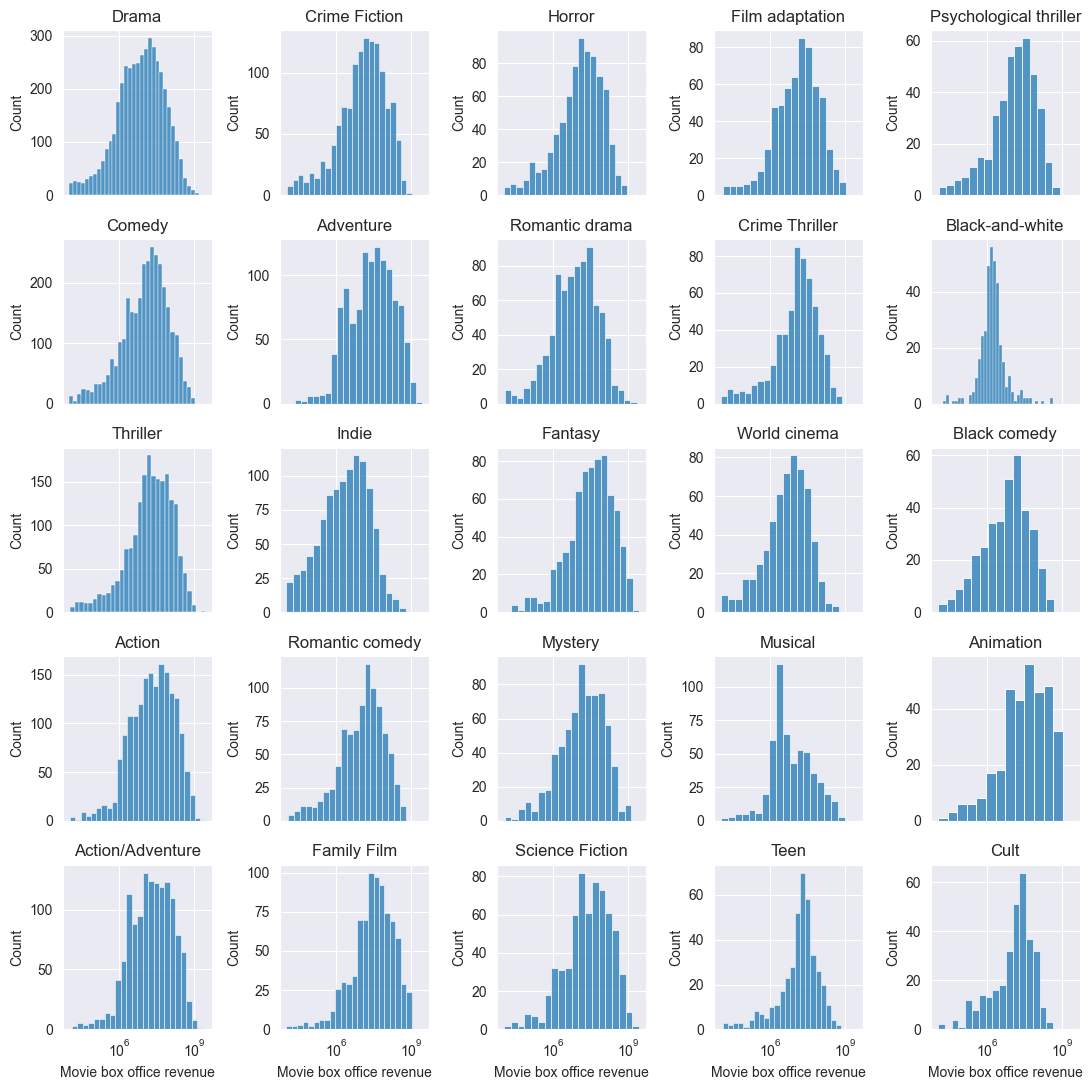

In [167]:
plot_metadata_frequency_against_metric(metadata_df, genre_prefix, correlated_genres_to_revenue, box_office_rev)

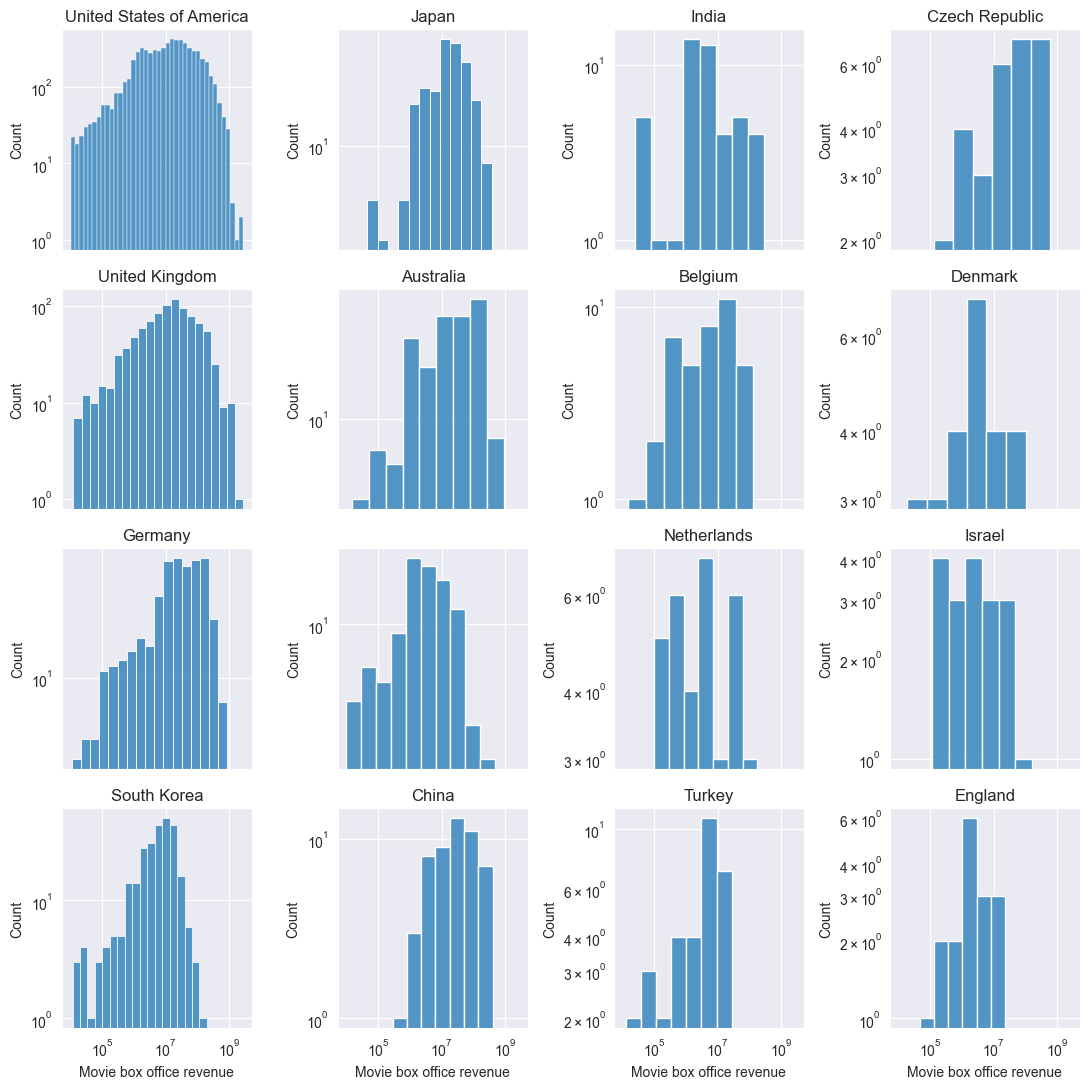

In [168]:
plot_metadata_frequency_against_metric(metadata_df, cntry_prefix, correlated_cntry_to_revenue, box_office_rev, log_scale=(True, True))

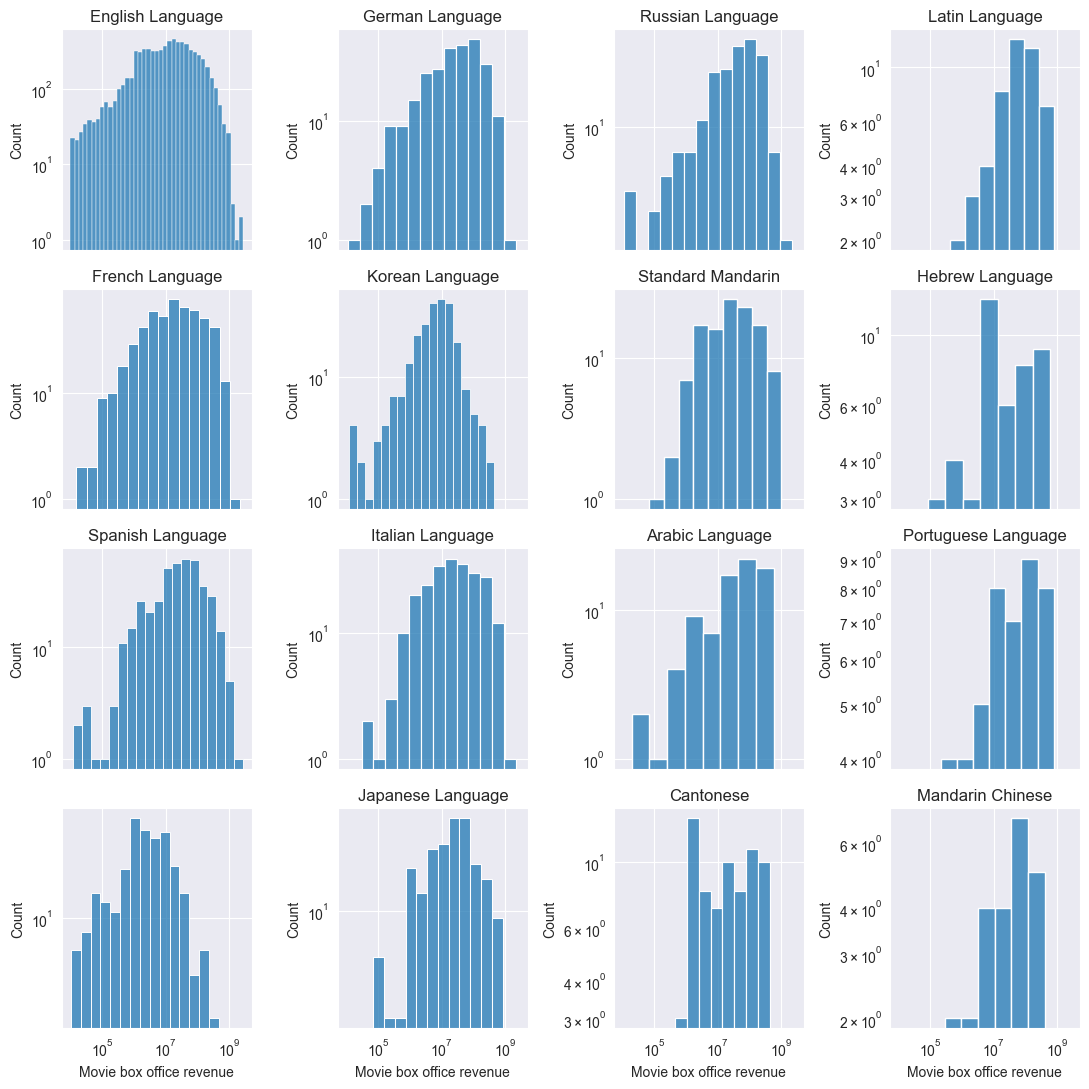

In [169]:
plot_metadata_frequency_against_metric(metadata_df, langs_prefix, correlated_langs_to_revenue, box_office_rev, log_scale=(True, True))